In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Loading Dataset

In [2]:
import os

DATASET_PATH = "dataset"
INPUT_SHAPE = (256, 256)

X, y = [], []

# initialize a dictionary that will map class index to class names
label_map_dict = dict()

class_hist = []
for class_index, class_ in enumerate(os.listdir(DATASET_PATH)):
    
    label_map_dict[class_index] = class_
    
    class_path = os.path.join(DATASET_PATH, class_)

    for img_name in os.listdir(class_path):
        class_hist.append(class_)
        
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        
        img = cv2.resize(img, INPUT_SHAPE, interpolation=cv2.INTER_AREA)
        
        X.append(img)
        y.append(class_index)
       
X = np.array(X, dtype=np.uint8)
y = np.array(y, dtype=np.int64)

print("X shape", X.shape)
print("y shape", y.shape)

X shape (2152, 256, 256, 3)
y shape (2152,)


### Plot the Loaded Dataset

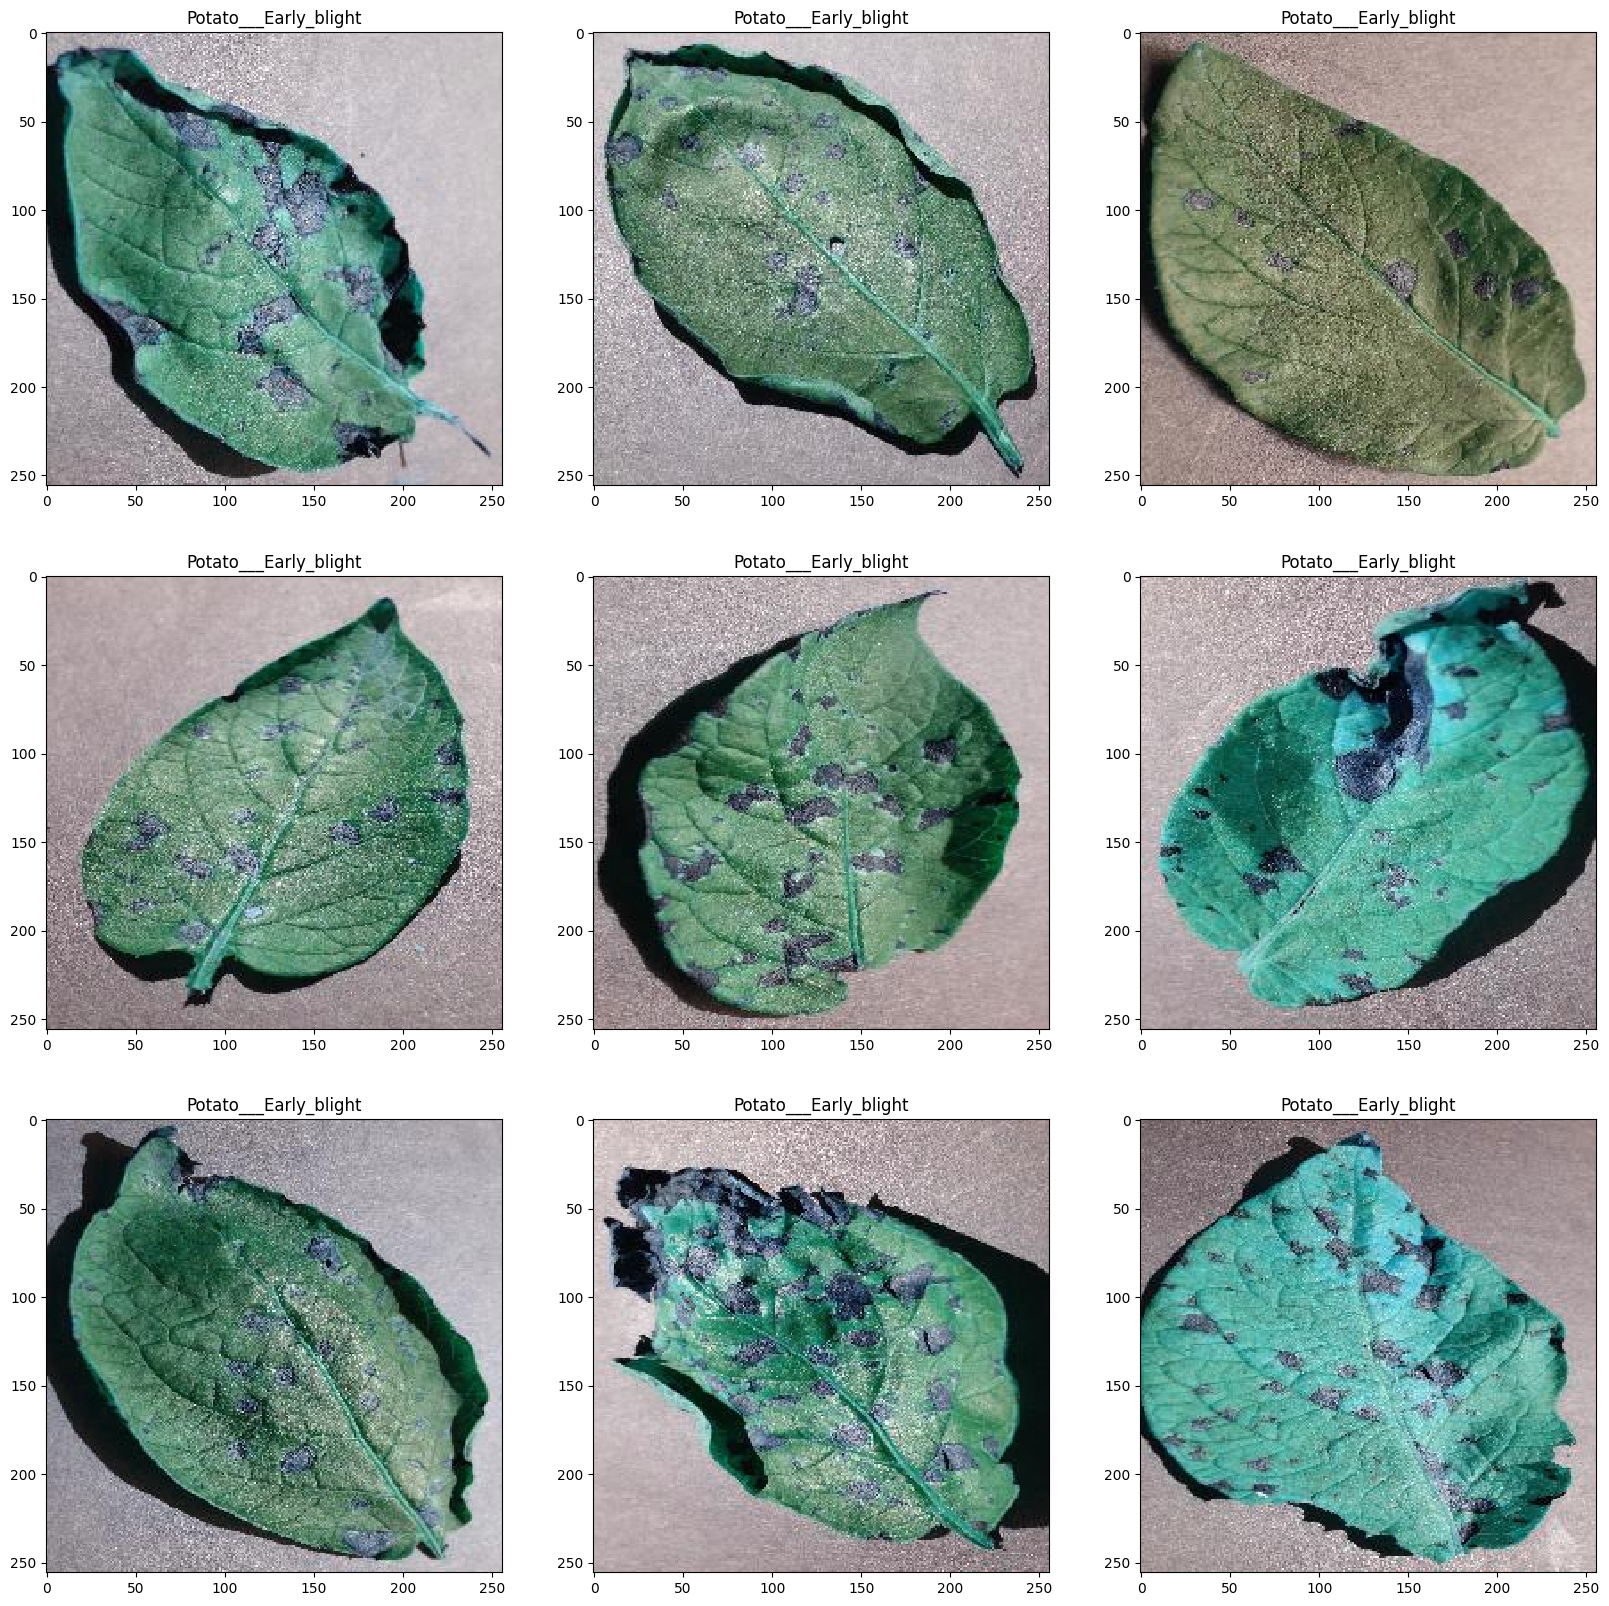

In [3]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
import os

def plotSamples(X, random=False):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
    index = 0
    for row in range(3):
        for col in range(3):
            
            if random:
                index = random.randint(0, len(X))
            else:
                index += 1
                
            image, class_index = X[index], y[index]
            actual_class = label_map_dict[class_index]
            
            if len(image.shape) == 2:
                axes[row][col].imshow(image, cmap="gray", interpolation='nearest', aspect='auto')
            else:
                axes[row][col].imshow(image, interpolation='nearest', aspect='auto')

            axes[row][col].set_title(actual_class)

    plt.show()
    
plotSamples(X)

### Plot Class Histrogram

Class 			 Count
Potato___Early_blight 	 1000
Potato___healthy 	 152
Potato___Late_blight 	 1000


<function matplotlib.pyplot.show(close=None, block=None)>

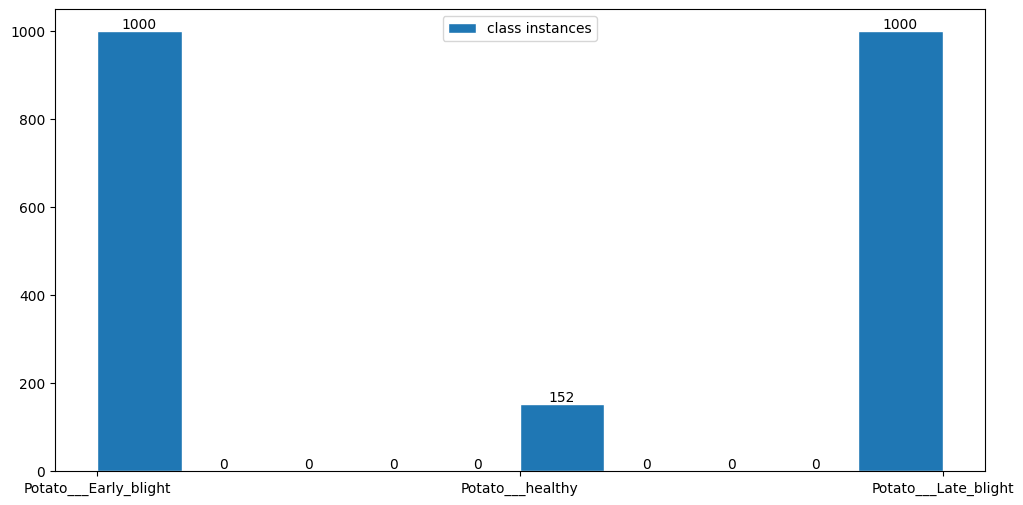

In [4]:
import collections
counter = collections.Counter(class_hist)

print(f"Class \t\t\t Count")
for class_index, count in counter.items():
    print(f"{class_index} \t {count}")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
freq, bins, patches = plt.hist(class_hist, edgecolor='white', label='class instances')

bin_centers = np.diff(bins) * 0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
  height = int(freq[n])
  plt.annotate("{}".format(height),
               xy = (x, height),          
               xytext = (0,0.2),             
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )
  n += 1

plt.legend()
plt.show

## Preprocessing 1: Data Augmentation

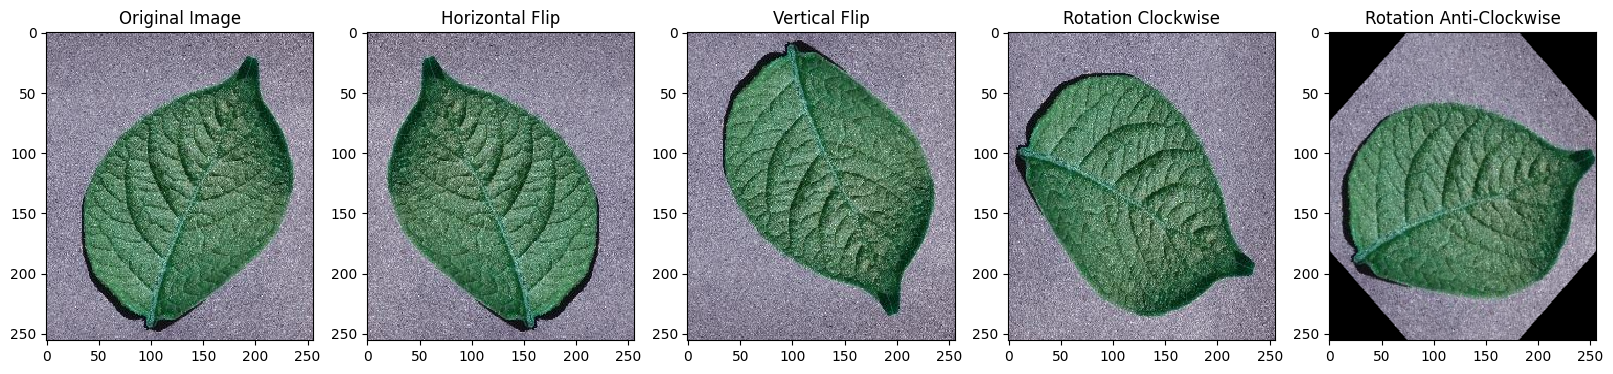

In [5]:
import os
import imgaug as ia
import imgaug.augmenters as iaa

hflip = iaa.Fliplr(p=1.0)
vflip= iaa.Flipud(p=1.0) 
rot_c = iaa.Affine(rotate=(90, 90))
rot_ac = iaa.Affine(rotate=(-90, -90))
rot_45 = iaa.Affine(rotate=(45, 45))


test_image = X[1111]

# plot the original image here
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
axes[0].imshow(test_image, interpolation='nearest', aspect='auto')
axes[0].set_title("Original Image")

# horizontally flip the image and plot
img_opted = hflip.augment_image(test_image)
axes[1].imshow(img_opted, interpolation='nearest', aspect='auto')
axes[1].set_title("Horizontal Flip")

# vertically flip the image and plot
img_opted = vflip.augment_image(test_image)
axes[2].imshow(img_opted, interpolation='nearest', aspect='auto')
axes[2].set_title("Vertical Flip")

# rotate the image 90 degrees Clockwise and plot
img_opted = rot_c.augment_image(test_image)
axes[3].imshow(img_opted, interpolation='nearest', aspect='auto')
axes[3].set_title("Rotation Clockwise")

# rotate the image 90 degrees Anti-Clockwise and plot
img_opted = rot_ac.augment_image(test_image)
axes[4].imshow(img_opted, interpolation='nearest', aspect='auto')
axes[4].set_title("Rotation Anti-Clockwise")

# rotate the image 45 degrees Anti-Clockwise and plot
img_opted = rot_45.augment_image(test_image)
axes[4].imshow(img_opted, interpolation='nearest', aspect='auto')
axes[4].set_title("Rotation Anti-Clockwise")

# show the plot
plt.show()

#### Apply Augmentation to the Dataset class Potato___healthy

In [6]:
import os
import imgaug as ia
import imgaug.augmenters as iaa

hflip = iaa.Fliplr(p=1.0)
vflip= iaa.Flipud(p=1.0) 
rot_c = iaa.Affine(rotate=(90, 90))
rot_ac = iaa.Affine(rotate=(-90, -90))
rot_45 = iaa.Affine(rotate=(45, 45))

X_aug, y_aug = [], []
class_hist_aug = []
for index in range(len(X)):
    
    image, class_index = X[index], y[index]
    
    if label_map_dict[class_index] == "Potato___healthy":
        X_aug.append(image)
        y_aug.append(class_index)
        class_hist_aug.append(label_map_dict[class_index])

        for i_, op in enumerate([hflip, vflip, rot_c, rot_ac,rot_45]):
            img_opted = op.augment_image(image)
            X_aug.append(img_opted)
            y_aug.append(class_index)
            class_hist_aug.append(label_map_dict[class_index])

    else:
        X_aug.append(image)
        y_aug.append(class_index)
        class_hist_aug.append(label_map_dict[class_index])

X_aug = np.array(X_aug, dtype=np.uint8)
y_aug = np.array(y_aug, dtype=np.int64)

print("X shape", X_aug.shape)
print("y shape", y_aug.shape)

X shape (2912, 256, 256, 3)
y shape (2912,)


### Plot Class Histrogram of the Augmented Dataset

Class 			 Count
Potato___Early_blight 	 1000
Potato___healthy 	 912
Potato___Late_blight 	 1000


<function matplotlib.pyplot.show(close=None, block=None)>

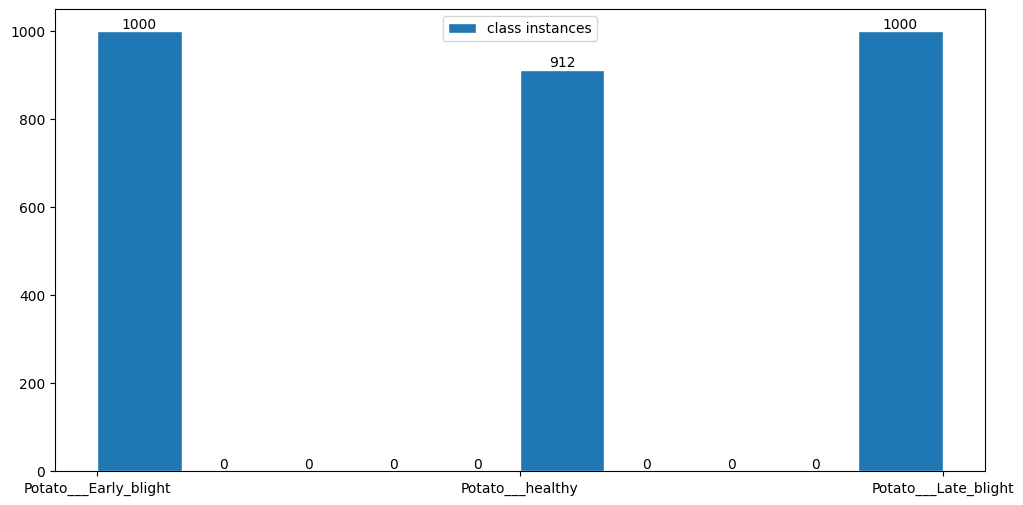

In [7]:
import collections
counter = collections.Counter(class_hist_aug)

print(f"Class \t\t\t Count")
for class_index, count in counter.items():
    print(f"{class_index} \t {count}")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
freq, bins, patches = plt.hist(class_hist_aug, edgecolor='white', label='class instances')

bin_centers = np.diff(bins) * 0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
  height = int(freq[n])
  plt.annotate("{}".format(height),
               xy = (x, height),            
               xytext = (0,0.2),             
               textcoords = "offset points",
               ha = 'center', va = 'bottom'
               )
  n += 1

plt.legend()
plt.show

## Preprocessing 2: Apply Gaussian Smoothing

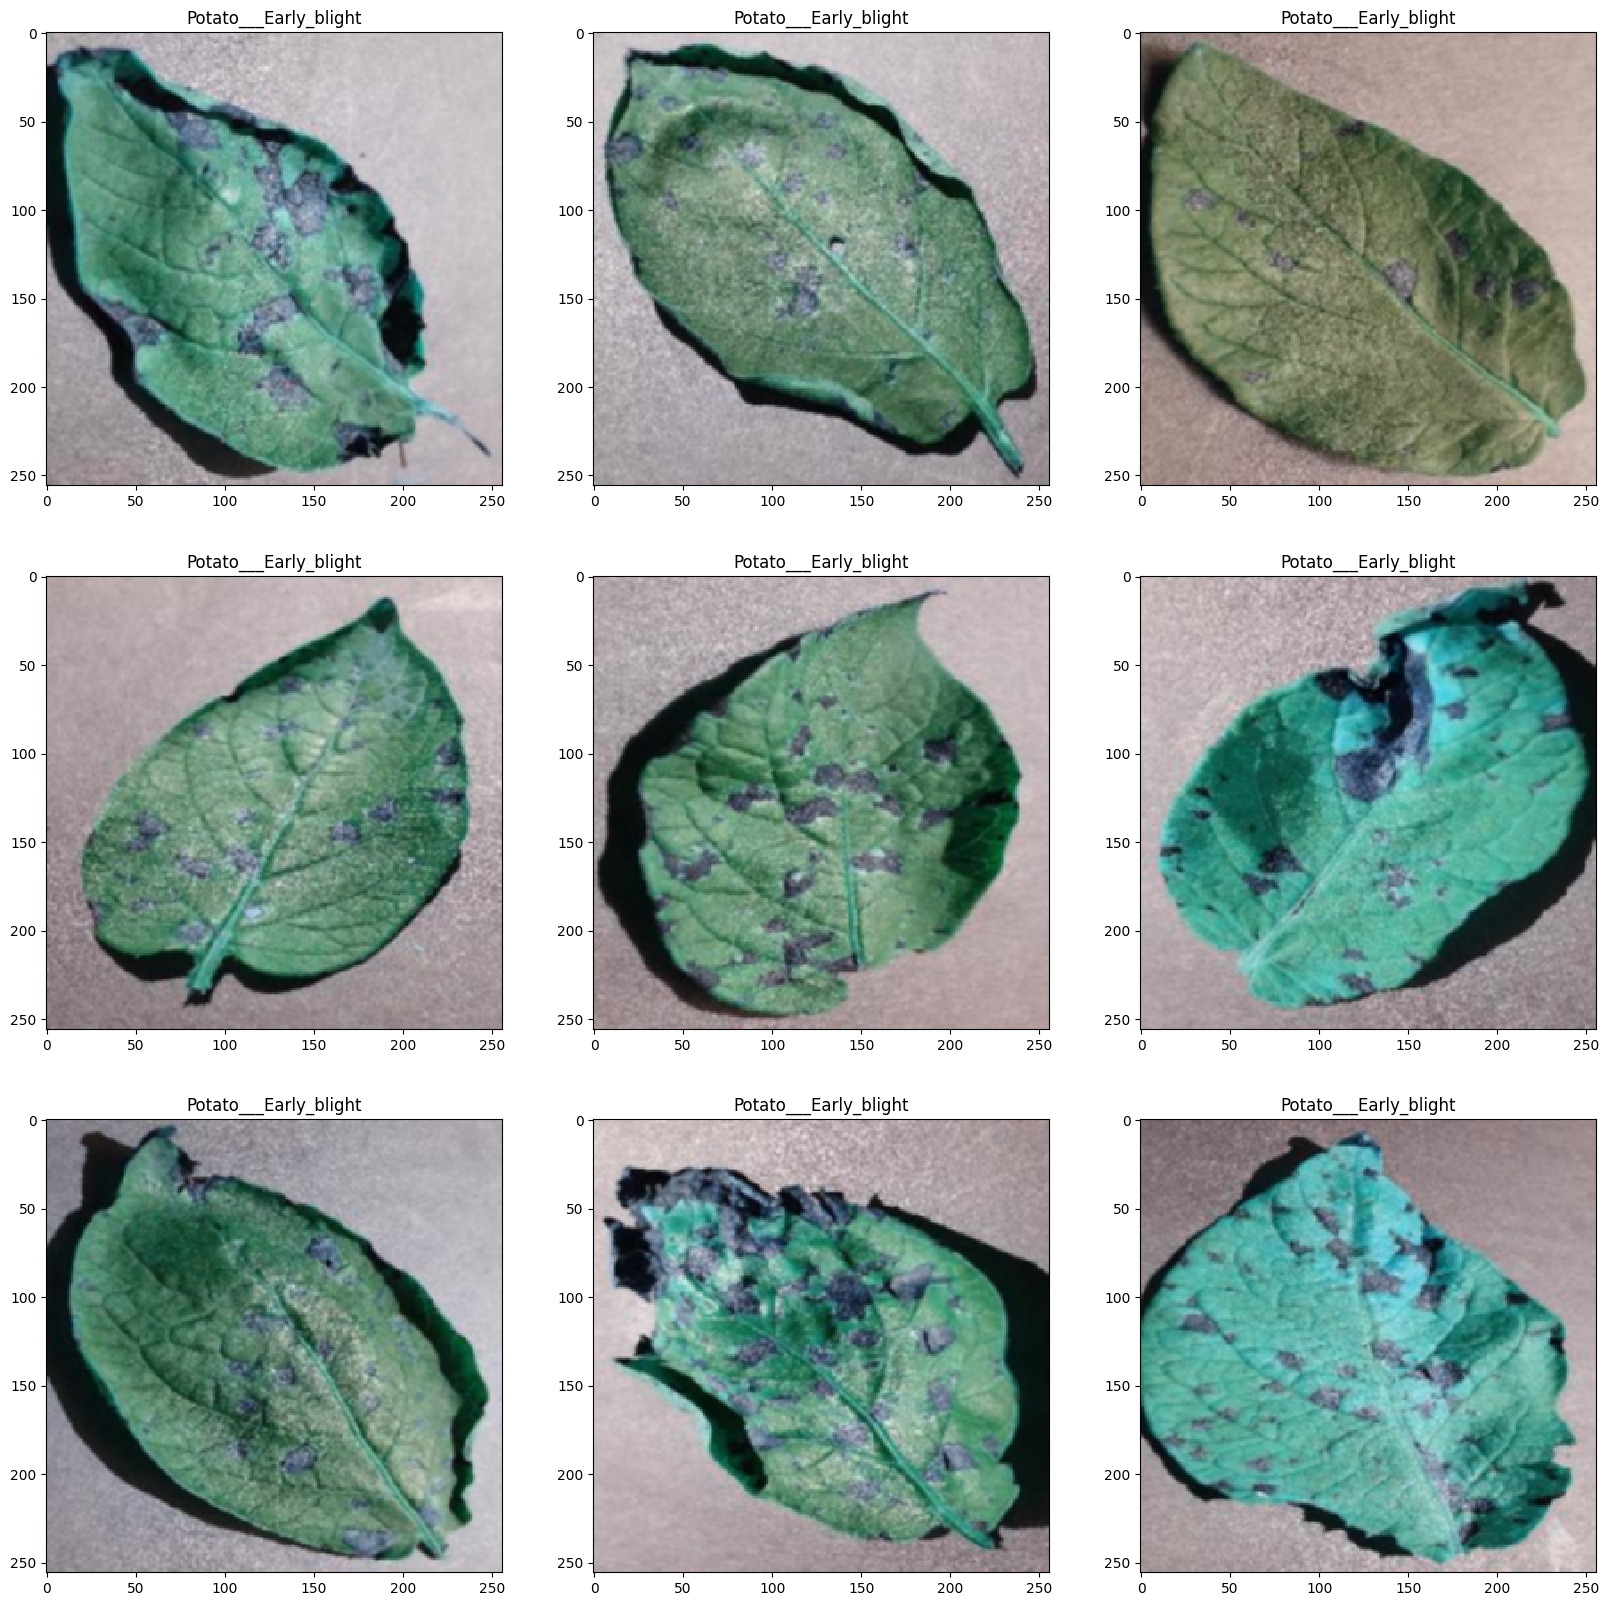

In [8]:
import cv2 

X_smoothed = [None for _ in range(len(X_aug))]
kernel_size = (3, 3)
for index in range(len(X_aug)):
    img = X_aug[index]    
    blurImg = cv2.GaussianBlur(img, kernel_size, 0)
    
    X_smoothed[index] = blurImg
    
plotSamples(X_smoothed)

## Preprocessing 3: Image Normalization

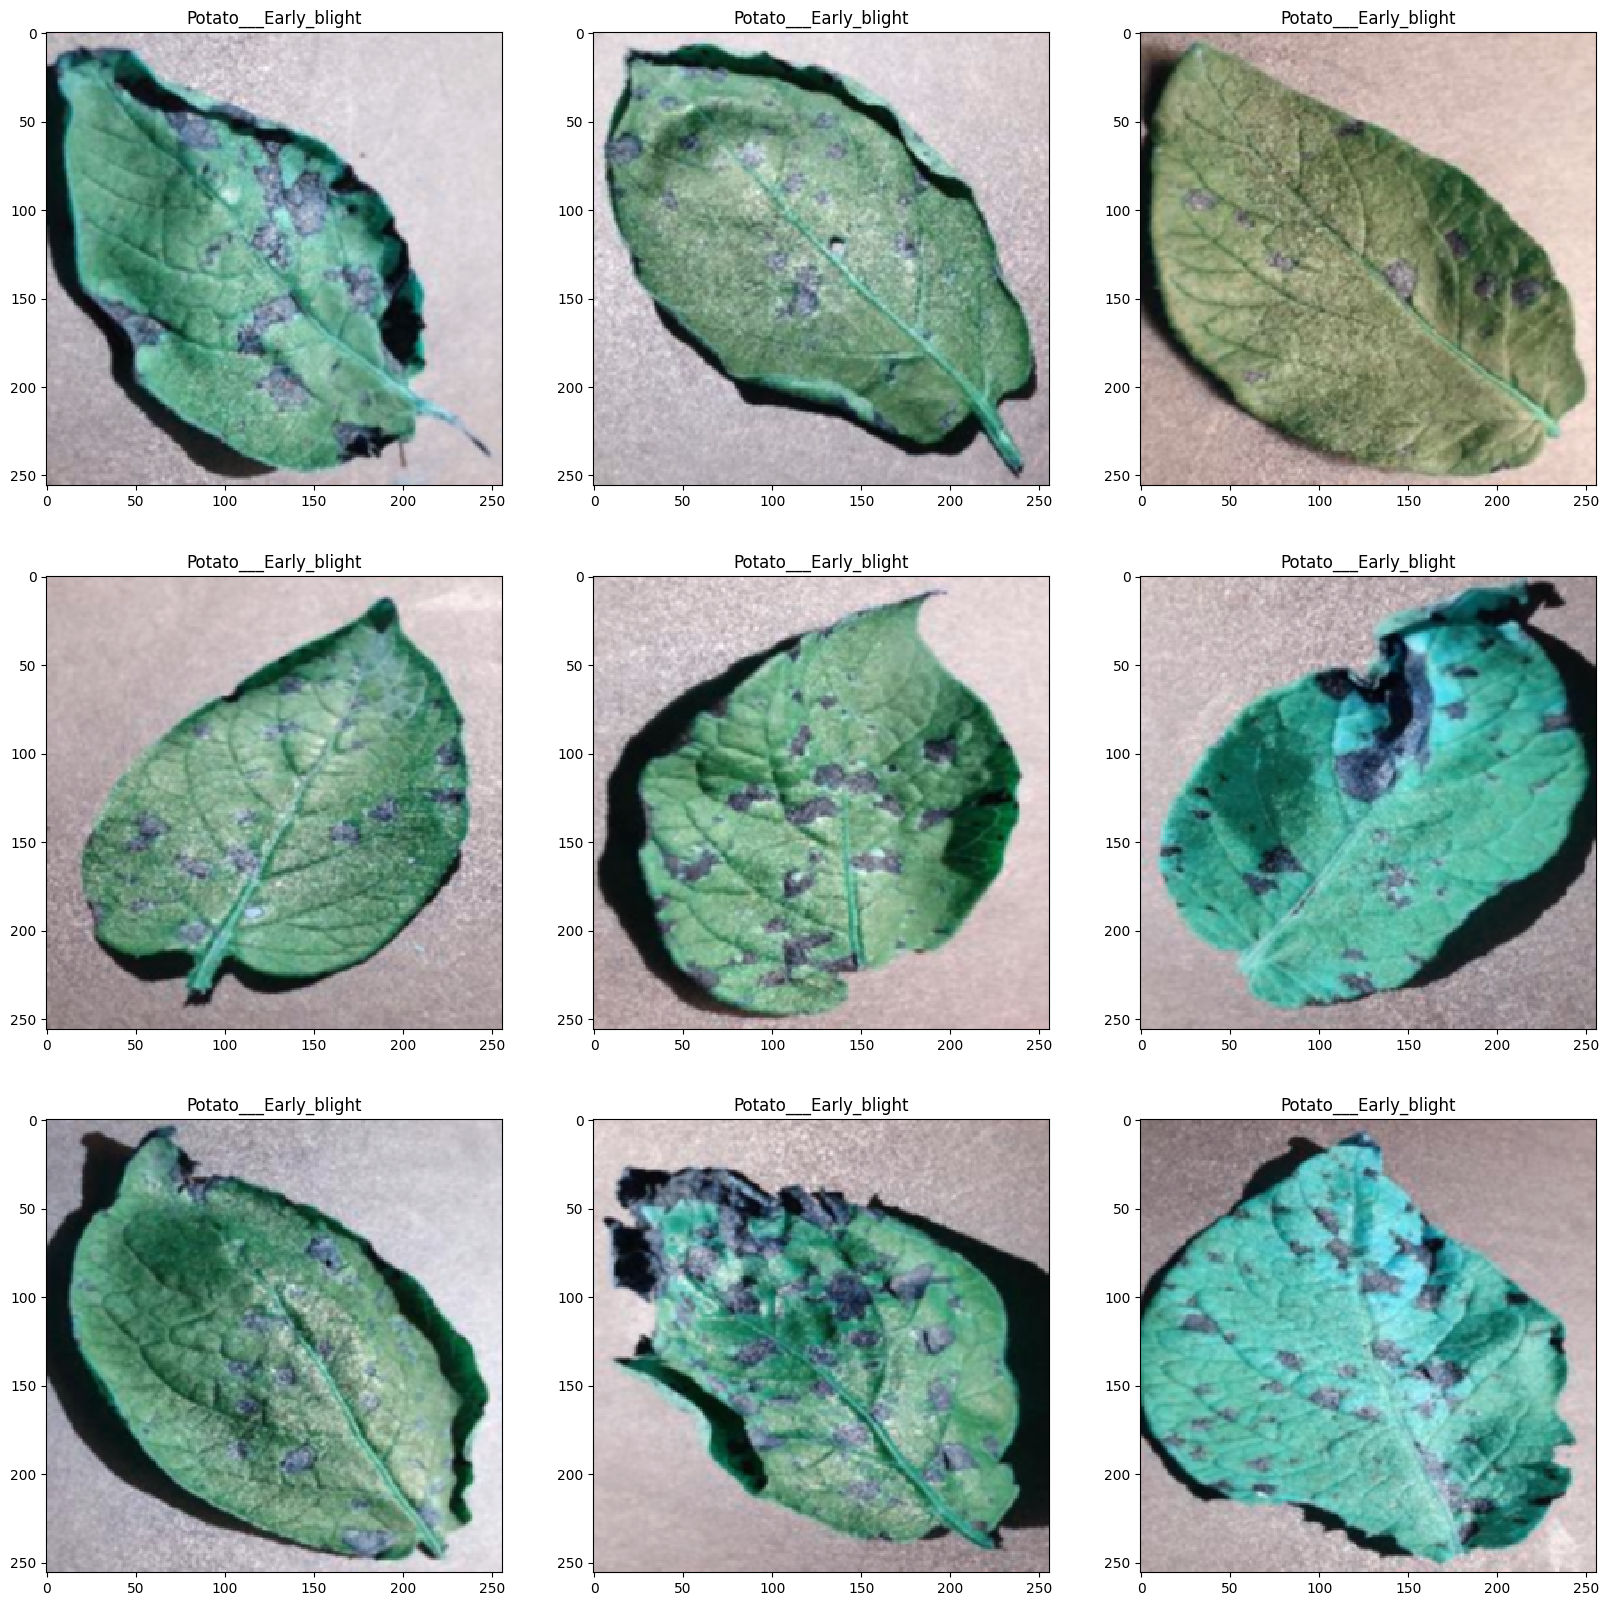

In [9]:
X_normalized = [None for _ in range(len(X_smoothed))]

for index in range(len(X_smoothed)):
    img = X_smoothed[index]
    
# apply normalization formula here
# new_range = (x - old_range_minimum) / (old_range_maximum - old_range_minimum)
    norm_image = (img - np.min(img)) / (np.max(img) - np.min(img))
    X_normalized[index] = norm_image

X_normalized = np.array(X_normalized, dtype=np.float32)

plotSamples(X_normalized)

## Preprocessing 4: One Hot Encoding the Labels

In [10]:
y_one_hot = [[0, 0, 0] for _ in range(len(y_aug))]
for i in range(len(y_aug)):
    class_index = y_aug[i]
    
    y_one_hot[i][class_index] = 1

y_one_hot = np.array(y_one_hot, dtype=np.int64)
print("y shape", y_one_hot.shape)    

y shape (2912, 3)


## Splitting the Dataset into Train and Test Sets

In [11]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_one_hot, test_size=TEST_SIZE, random_state=42, shuffle=True)

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)

print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (2329, 256, 256, 3)
y_train shape (2329, 3)
X_test shape (583, 256, 256, 3)
y_test shape (583, 3)


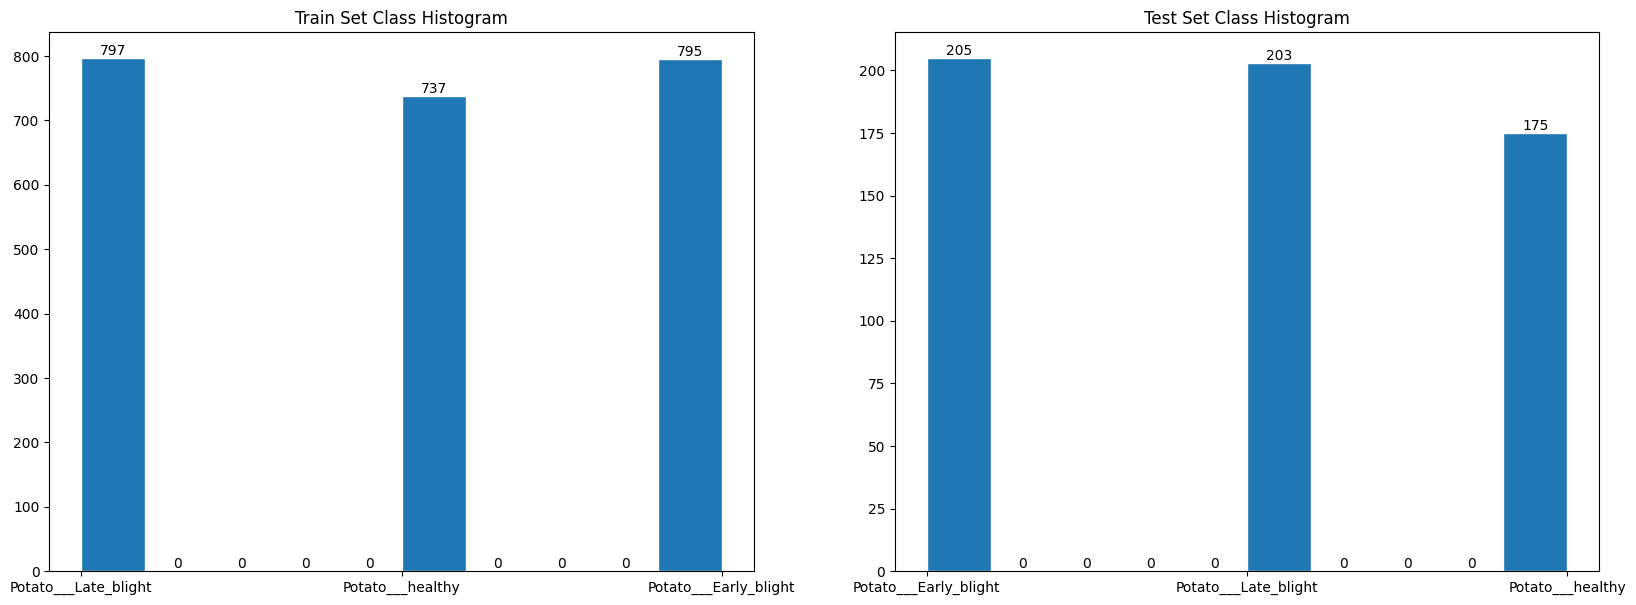

In [12]:
hist_test = []
for label in y_test:
    hist_test.append(label_map_dict[np.argmax(label)])

hist_train = []
for label in y_train:
    hist_train.append(label_map_dict[np.argmax(label)])
    
def plotHist(freq, bins, patches, axis=0):
    bin_centers = np.diff(bins) * 0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
      height = int(freq[n])
      axes[axis].annotate("{}".format(height),
                   xy = (x, height),             
                   xytext = (0,0.2),             
                   textcoords = "offset points",
                   ha = 'center', va = 'bottom')
      n += 1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# plot training set class histogram
freq, bins, patches = axes[0].hist(hist_train, edgecolor='white')
axes[0].set_title("Train Set Class Histogram")
plotHist(freq, bins, patches, axis=0)

# plot testing set class histogram
freq, bins, patches = axes[1].hist(hist_test, edgecolor='white')
axes[1].set_title("Test Set Class Histogram")
plotHist(freq, bins, patches, axis=1)
plt.show()

# Building Custom CNN Model Using Keras

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input, Dense, Flatten, Conv1D, Conv2D, MaxPooling2D, BatchNormalization, Dropout
)

from tensorflow.keras.layers import (
    Input, Dense, Flatten, Conv1D, MaxPooling1D, BatchNormalization, Dropout
)

import tensorflow as tf
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


def Model(input_shape=(256, 256, 3), num_classes=3, activation='softmax'):
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, name='input'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (3, 3), activation='relu'))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation=activation, name='class_out'))
    
    LR = 1e-4
    opt = tf.keras.optimizers.Nadam(LR)  
    
    metrics = [
      'acc',
      precision_m, 
      recall_m,
      f1_m
    ]
    
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=opt, 
        metrics=metrics
    )
    return model


input_shape = (256, 256, 3)
model = Model(input_shape=input_shape, num_classes=3)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Conv2D)              (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                        

## Start Training the Model

In [18]:
batch_size = 16
num_epochs = 20
validation_split_ratio = 0.2

history = model.fit(
    X_train, 
    y_train,
    validation_split=validation_split_ratio,
    epochs=num_epochs,
    batch_size=batch_size,
    shuffle= True
)

Epoch 1/20
117/117 [==============================] - 6s 47ms/step - loss: 0.0254 - acc: 0.9903 - precision_m: 0.9904 - recall_m: 0.9904 - f1_m: 0.9904 - val_loss: 0.1532 - val_acc: 0.9549 - val_precision_m: 0.9563 - val_recall_m: 0.9563 - val_f1_m: 0.9563
Epoch 2/20
117/117 [==============================] - 5s 43ms/step - loss: 0.0332 - acc: 0.9898 - precision_m: 0.9899 - recall_m: 0.9899 - f1_m: 0.9899 - val_loss: 1.0065 - val_acc: 0.8648 - val_precision_m: 0.8687 - val_recall_m: 0.8687 - val_f1_m: 0.8687
Epoch 3/20
117/117 [==============================] - 5s 42ms/step - loss: 0.0395 - acc: 0.9898 - precision_m: 0.9899 - recall_m: 0.9899 - f1_m: 0.9899 - val_loss: 0.1445 - val_acc: 0.9742 - val_precision_m: 0.9750 - val_recall_m: 0.9750 - val_f1_m: 0.9750
Epoch 4/20
117/117 [==============================] - 5s 41ms/step - loss: 0.0157 - acc: 0.9957 - precision_m: 0.9957 - recall_m: 0.9957 - f1_m: 0.9957 - val_loss: 0.1239 - val_acc: 0.9721 - val_precision_m: 0.9749 - val_recall_m

### Training Loss vs Validation Loss Plot

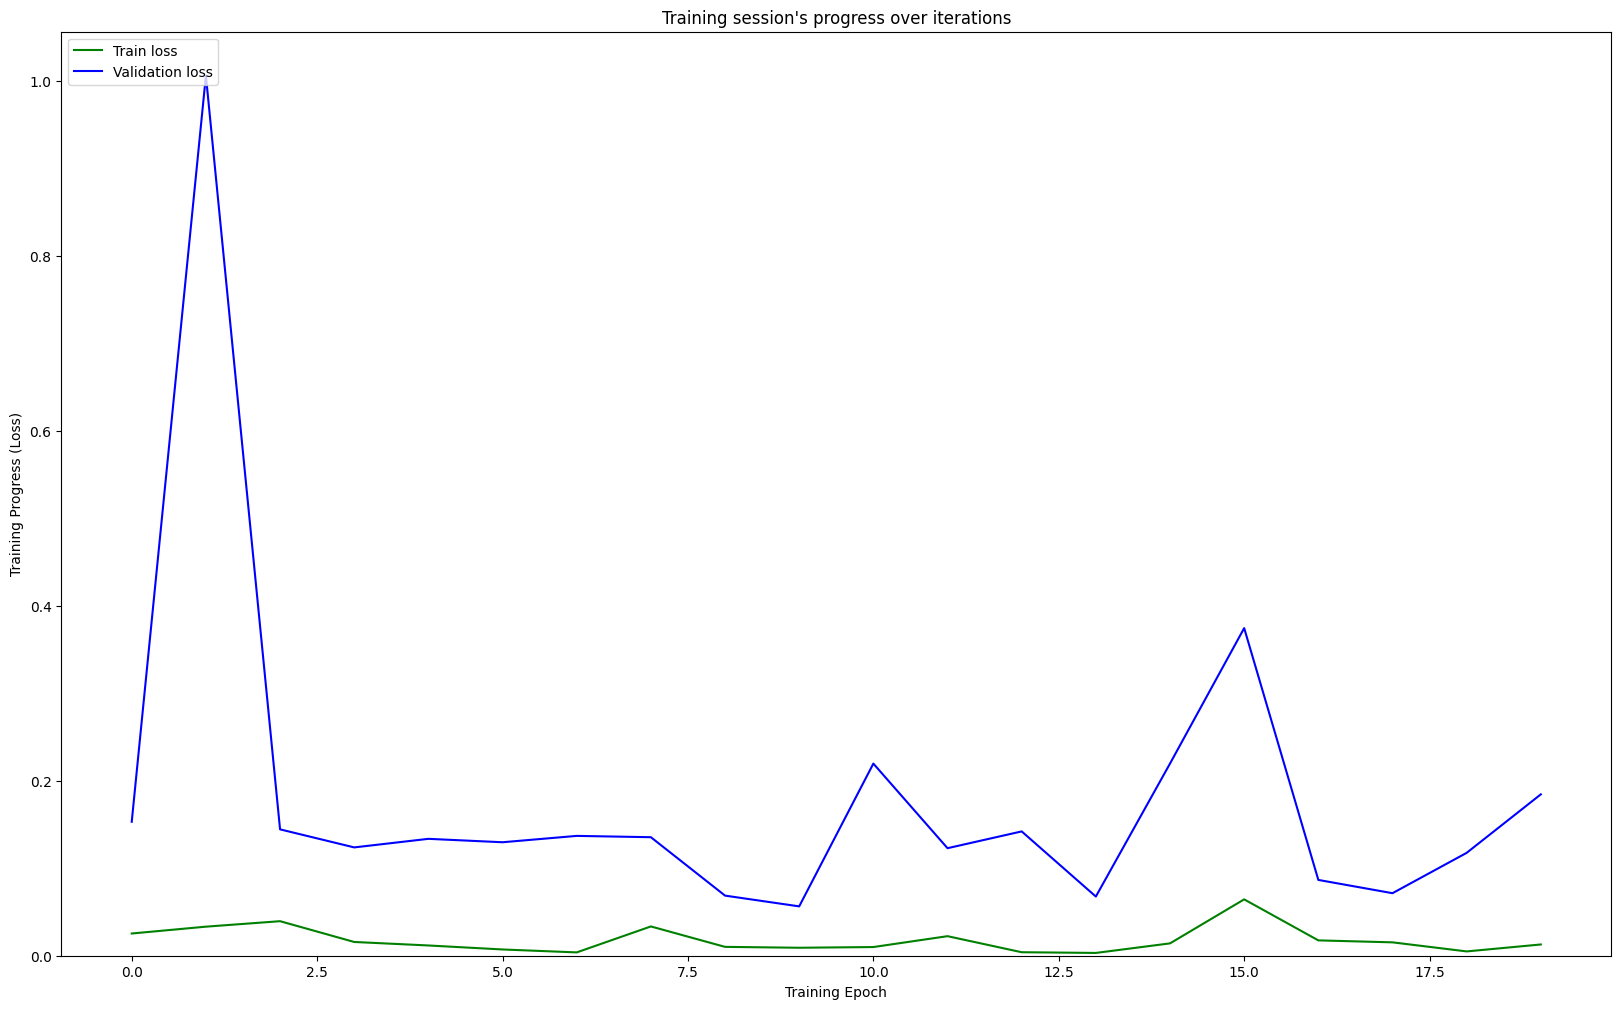

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))

plt.plot(np.array(history.history['loss']), "green", label = "Train loss")
plt.plot(np.array(history.history['val_loss']), "blue", label = "Validation loss")
plt.title("Training session's progress over iterations")
plt.legend(loc='upper left')
plt.ylabel('Training Progress (Loss)')
plt.xlabel('Training Epoch')
plt.ylim(0) 

plt.show()

### Training Accuracy Vs Validation Accuracy Plot

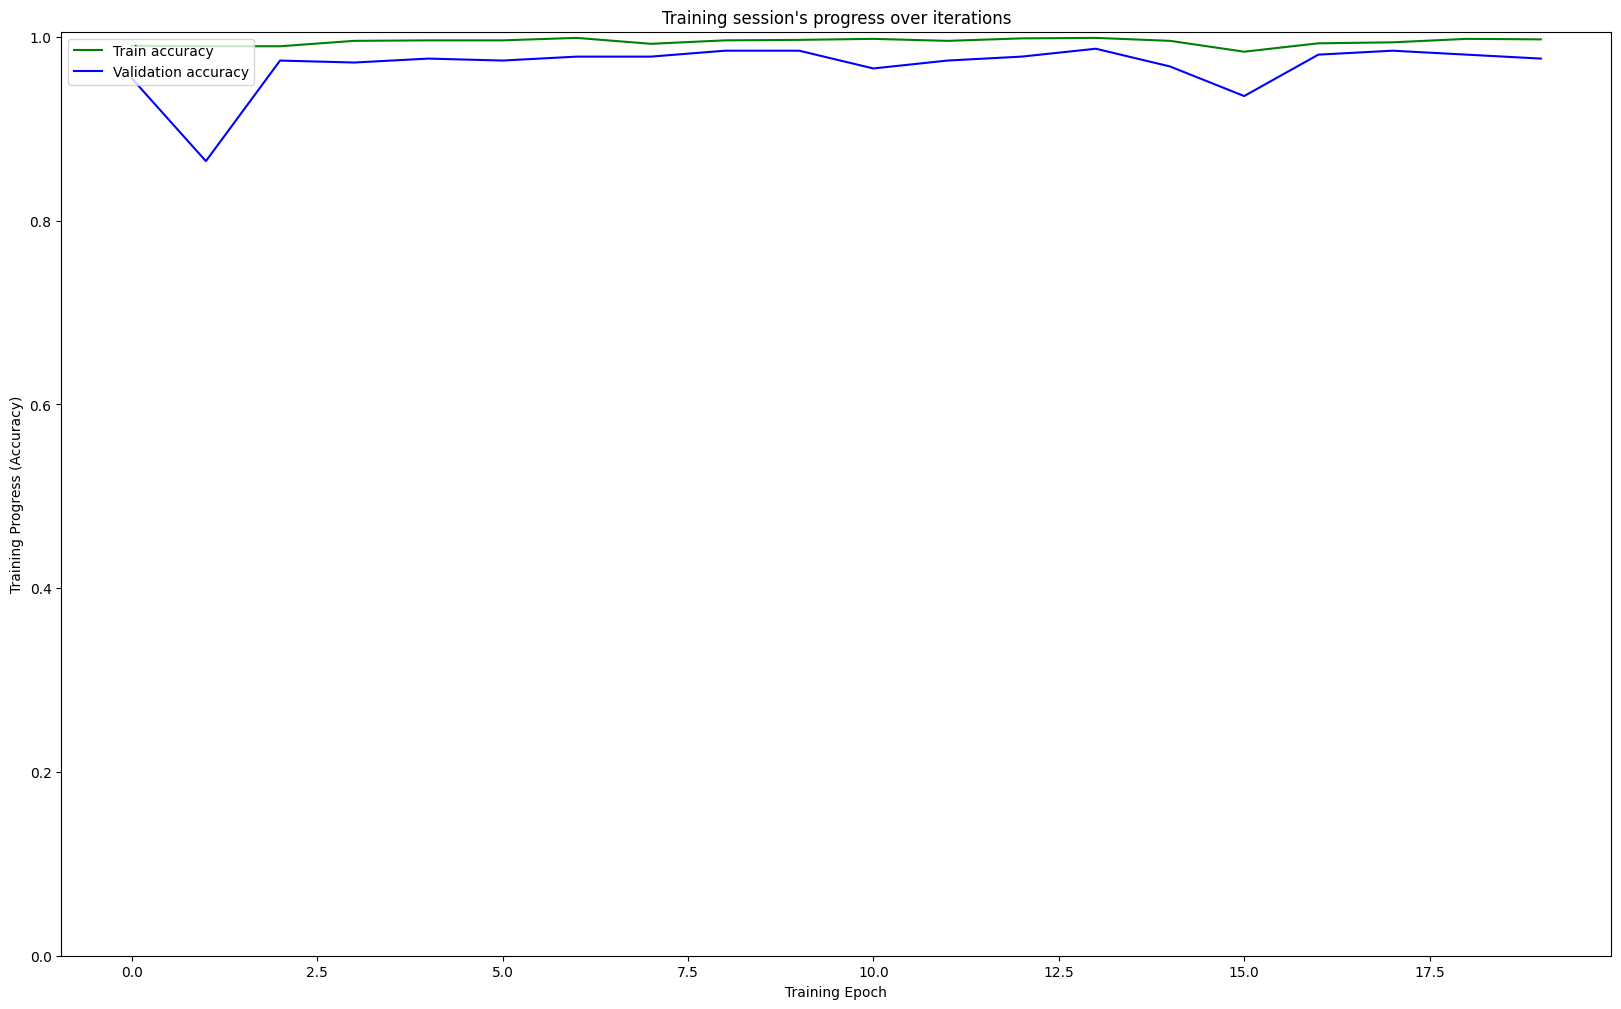

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))

plt.plot(np.array(history.history['acc']), "green", label = "Train accuracy")
plt.plot(np.array(history.history['val_acc']), "blue", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='upper left')
plt.ylabel('Training Progress (Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

## Evaluating Model Performance on the Test Data

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

batch_size = 32

results = model.evaluate(
    X_test, 
    y_test,
)

print()
print("loss:", results[0])
print("accuracy:", results[1])
print("precision:", results[2])
print("recall:", results[3])
print("f1:", results[4])

19/19 [==============================] - 1s 23ms/step - loss: 0.2295 - acc: 0.9726 - precision_m: 0.9737 - recall_m: 0.9737 - f1_m: 0.9737

loss: 0.22949302196502686
accuracy: 0.9725557565689087
precision: 0.9736841917037964
recall: 0.9736841917037964
f1: 0.9736841917037964


## Save Model and Clear RAM

In [22]:
model_name = 'Potato___Disease_Detection.h5'
model.save(model_name)

## Loading the pre-saved model

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


model_loaded = tf.keras.models.load_model(
    "Potato___Disease_Detection.h5",
    custom_objects= {
        "recall_m": recall_m,
        "precision_m": precision_m,
        "f1_m": f1_m,
    }
)

## Making Predictions using trained model

1/1 [==============================] - 0s 17ms/step


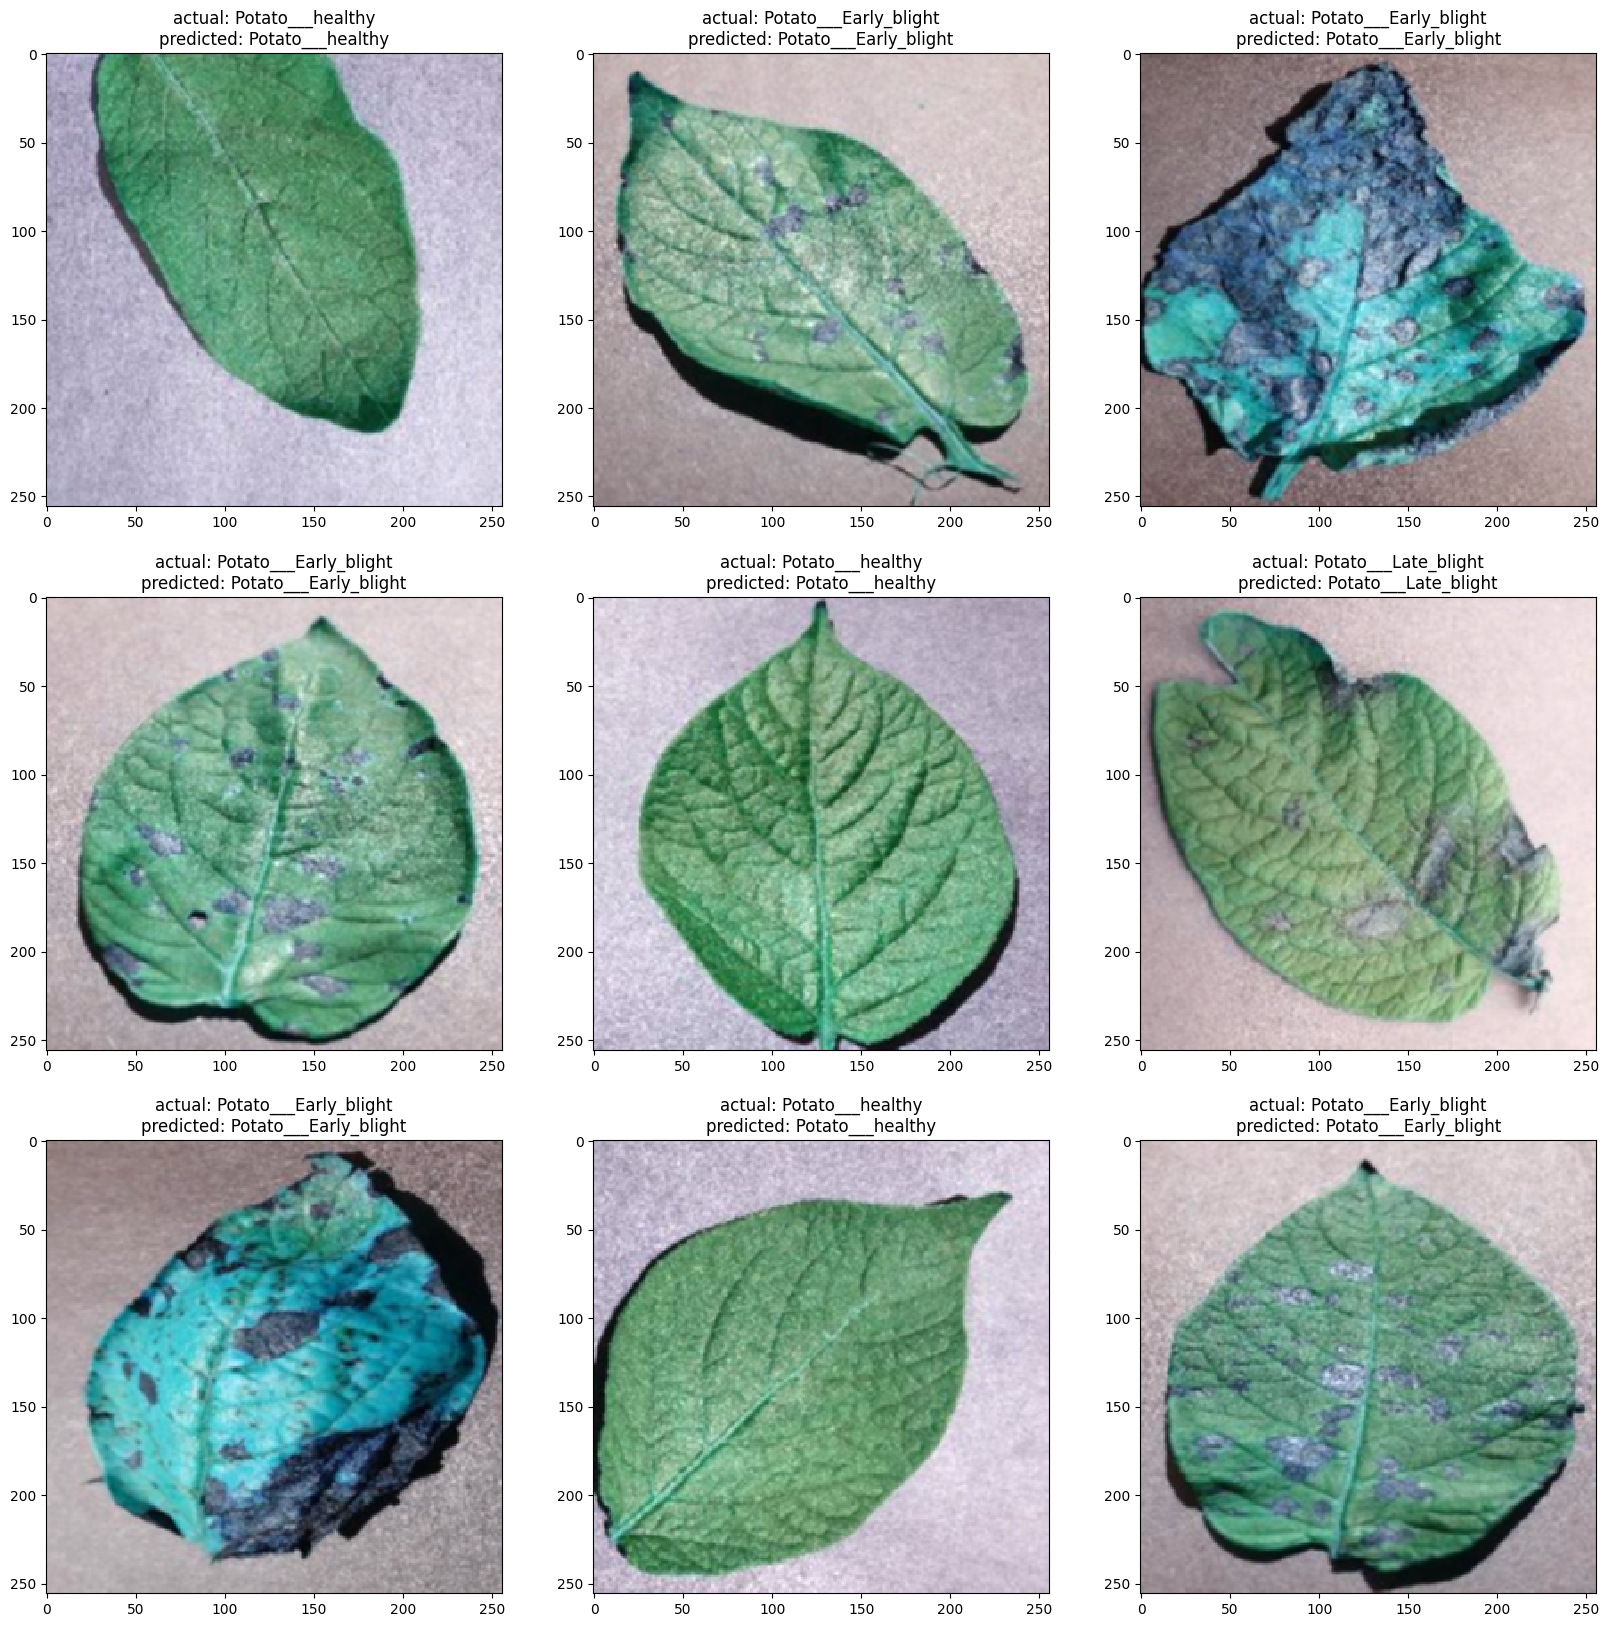

In [24]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
import os


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

for row in range(3):
    for col in range(3):        
        index = random.randint(0, len(X_test))
        image, labels = X_test[index], y_test[index]
        actual_class = label_map_dict[np.argmax(labels, axis=0)]

        images_batch = np.expand_dims(image, axis=0)
        predictions = model.predict(images_batch)
        prediction = np.argmax(predictions, axis=1)[0]
        predicted_class = label_map_dict[prediction]

        img = np.uint8(image * 255)
        axes[row][col].imshow(img, interpolation='nearest', aspect='auto')
        
        label = f"actual: {actual_class}\npredicted: {predicted_class}"
        axes[row][col].set_title(label)
        
plt.show()